<a href="https://colab.research.google.com/github/VitalyGladyshev/med_work/blob/main/Med_Stat_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладная статистика в медицине

## ДЗ 5 Гладышев В.В.

## Пермутационный тест, бутстрап анализ и метод максимального правдоподобия

### Загрузка и подключение библиотек

In [5]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [8]:
library("boot") #подключение библиотеки
library(tidyverse)

In [9]:
install.packages('bootstrap')
library("bootstrap") #подключение библиотеки

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
install.packages('coin')
library(coin) #подключение библиотеки

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘mvtnorm’, ‘multcomp’


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:boot’:

    aml




### Загрузка и подготовка данных

In [1]:
data_metadata <- read.csv('/content/metadata.tsv', header = TRUE, sep = '\t')
head(data_metadata)

,Vialnumber,Patientnumber,Sucrose,Name,Group,Date,Age,Plasmavolume,Ht,Wt,⋯,rlatmax,rantmax,rposmax,llatmax,lantmax,lposmax,carotidIMTmean,Plaque,Statins,comorbidities
,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,1,50,0,"Begaye, Decarlo",0,2023-01-14,63,6.5,163,84.0,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425000,1,1,NA
2,2,51,0,"Sweetwater, Kristen",0,2022-10-09,47,5.5,179,111.0,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400000,1,0,NA
3,3,52,0,"Figurelli, Samuel",1,2023-10-24,57,7.0,164,80.0,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,4,53,0,"Pamphille, Mehgan",1,2023-07-02,72,5.0,160,58.8,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
5,5,54,0,"Morgan, Rollin",1,2022-11-27,57,5.0,180,71.0,⋯,1.20,1.20,1.25,1.10,1.30,1.13,1.0983333,1,1,NA
6,6,55,0,"Abdul-Amin, Taelor",1,2022-07-12,79,6.2,160,64.0,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"


In [2]:
data_lipids_low <- read.csv('/content/low_density_lipids.tsv', header = TRUE, sep = '\t')
head(data_lipids_low)

,Vial.number,Patient.number,Name,GPLDL1,GPLDL2,GPLDL3,GPLDL4,GPLDL5,GPLDL6,GPLDL7,⋯,G1,G2,G3,S0,S1,S2,S3,B,F,HM
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,50,LDL,0.40,6.74,0.20,0.02,1.09,3.79,2.27,⋯,4.09,68.91,3.57,3.98,28.18,42.46,1.95,0.02,1.67,13.02
2,3,52,LDL,0.46,7.37,0.39,0.02,1.06,4.55,2.71,⋯,5.16,68.22,3.11,4.64,30.43,39.86,1.56,0.02,1.69,14.16
3,4,53,LDL,0.30,8.23,0.26,0.02,0.88,3.66,2.32,⋯,3.95,68.03,4.50,3.78,29.37,41.13,2.20,0.02,1.89,13.89
4,5,54,LDL,0.47,7.94,0.29,0.02,1.11,3.97,2.55,⋯,4.63,66.91,4.03,4.44,28.54,40.64,1.95,0.02,2.03,14.25
5,6,55,LDL,0.31,9.68,0.18,0.02,0.97,4.50,2.24,⋯,4.05,64.01,5.27,3.72,26.71,40.39,2.51,0.02,2.70,16.06
6,7,56,LDL,0.30,7.32,0.22,0.02,1.12,4.19,2.37,⋯,4.10,65.99,4.70,4.03,28.44,39.99,2.33,0.02,1.61,13.82


In [3]:
data_lipids_high <- read.csv('/content/high_density_lipids.tsv', header = TRUE, sep = '\t')
head(data_lipids_high)

,Vial.number,Patient.number,Name,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,⋯,G1,G2,G3,S0,S1,S2,S3,B,F,HM
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,50,HDL,0.38,1.78,0.14,0.05,0.73,2.90,1.57,⋯,12.23,58.69,20.97,2.87,29.57,44.39,15.06,0.05,7.35,2.49
2,3,52,HDL,0.43,1.30,0.23,0.05,0.59,2.62,1.62,⋯,11.98,57.50,21.94,2.92,29.60,43.93,14.97,0.05,8.71,1.53
3,4,53,HDL,0.41,3.86,0.31,0.10,0.96,3.19,2.42,⋯,15.00,62.10,12.74,4.20,37.03,40.68,7.93,0.10,4.81,5.08
4,5,54,HDL,0.50,1.79,0.23,0.06,0.77,2.96,1.76,⋯,12.85,56.02,22.70,3.32,30.01,41.78,16.46,0.06,8.85,2.30
5,6,55,HDL,0.40,3.69,0.17,0.03,0.80,3.04,1.62,⋯,13.81,59.78,16.14,3.02,33.69,42.18,10.84,0.03,7.25,4.33
6,7,56,HDL,0.37,2.96,0.22,0.05,1.00,3.00,2.11,⋯,14.61,60.59,15.63,3.75,35.18,41.66,10.24,0.05,5.10,3.87


In [4]:
dim(data_metadata); dim(data_lipids_low); dim(data_lipids_high)

[1] 38 49

[1] 29 38

[1] 27 38

In [6]:
data_metadata <- data_metadata %>% select_if(is.numeric)
data_lipids_high <- data_lipids_high %>% select_if(is.numeric)
data_lipids_low <- data_lipids_low %>% select_if(is.numeric)

In [7]:
str(data_metadata)

'data.frame':	38 obs. of  46 variables:
 $ Vialnumber    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Patientnumber : int  50 51 52 53 54 55 56 57 58 59 ...
 $ Sucrose       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Group         : int  0 0 1 1 1 1 1 1 0 1 ...
 $ Age           : int  63 47 57 72 57 79 61 70 50 53 ...
 $ Plasmavolume  : num  6.5 5.5 7 5 5 6.2 6.5 5.5 6 5.5 ...
 $ Ht            : int  163 179 164 160 180 160 164 162 150 172 ...
 $ Wt            : num  84 111 80 58.8 71 64 67 61 79 88.2 ...
 $ BMI           : num  31.6 34.6 29.7 23 21.9 ...
 $ Sys           : int  125 125 132 130 135 110 124 135 142 120 ...
 $ Dia           : int  76 82 80 90 75 75 82 78 95 80 ...
 $ PR            : int  67 65 92 68 70 66 84 72 88 60 ...
 $ Sm            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dm            : int  0 0 1 0 0 0 0 0 0 1 ...
 $ HT            : int  0 1 1 0 1 1 0 0 1 1 ...
 $ LVH           : int  1 1 1 0 0 1 0 1 0 1 ...
 $ IHD           : int  0 0 1 0 1 1 1 1 0 1 ...
 $ MI            : int  0 0 1 0 0

### Бутстрап

#### По средней

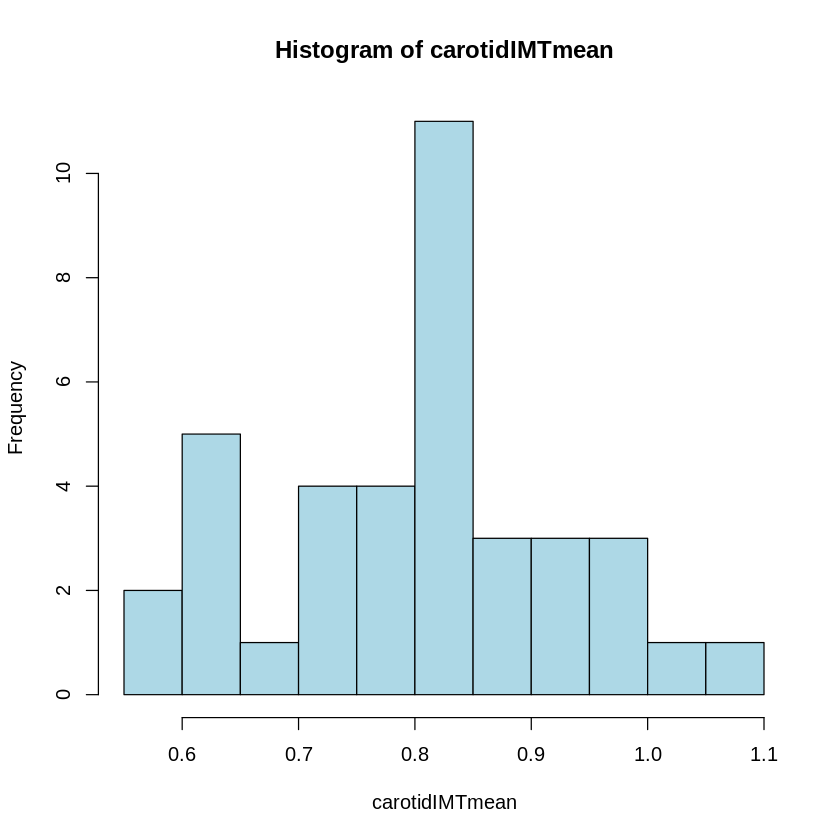

In [21]:
hist(data_metadata$carotidIMTmean, main = "Histogram of carotidIMTmean", xlab = "carotidIMTmean", col = "lightblue", breaks = 10)

In [22]:
shapiro_p <- shapiro.test(data_metadata$carotidIMTmean)$p.value
shapiro_p

[1] 0.5488396

In [24]:
myfn_i_mean <- function(x, i) {return(sum(x[i])/length(x[i]))}
result <- boot(data_metadata$carotidIMTmean, myfn_i_mean, R = 1000)
result


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_metadata$carotidIMTmean, statistic = myfn_i_mean, 
    R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8074781 -0.000369057  0.02008455

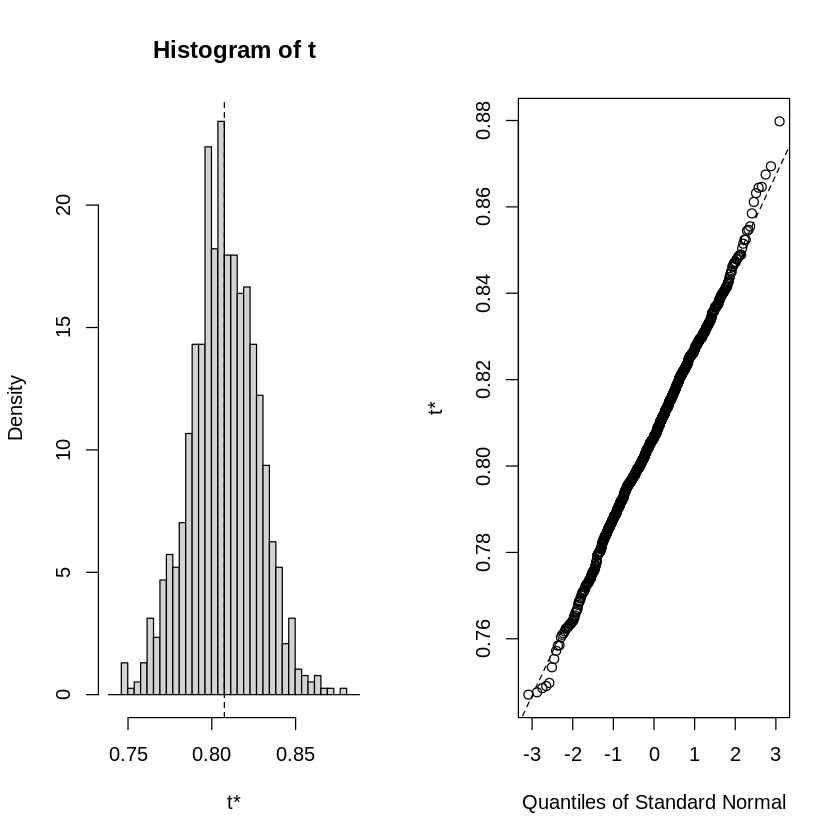

In [25]:
plot(result)

In [27]:
quantile(result$t, c(0.025, 0.975)) #доверительный интервал для среднеарифметического
mean(data_metadata$carotidIMTmean)

2.5%     97.5% 
0.7654024 0.8462823

[1] 0.8074781

Среднее полного набора данных параметра лежит в пределах доверительных интервалов. Не отвергаем нулевую гипотезу о равенстве средних с уровнем уверенности 95%


#### По дисперсии

In [29]:
myfn_i_variance <- function(x, i) {
  return(var(x[i]))
}
result <- boot(data_metadata$carotidIMTmean, myfn_i_variance, R = 1000)
result


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_metadata$carotidIMTmean, statistic = myfn_i_variance, 
    R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 0.01547123 -0.0003908631 0.003081881

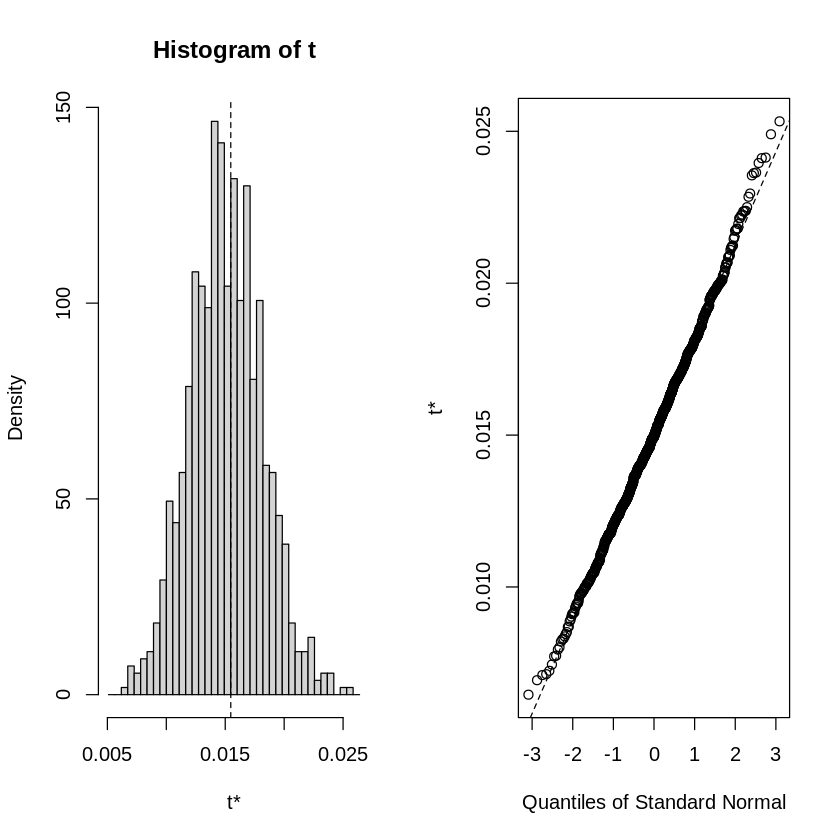

In [30]:
plot(result)

In [31]:
quantile(result$t, c(0.025, 0.975)) #доверительный интервал для дисперсии
var(data_metadata$carotidIMTmean)

2.5%       97.5% 
0.009296773 0.021243535

[1] 0.01547123

Дисперсия полного набора данных параметра лежит в пределах доверительных интервалов. Не отвергаем нулевую гипотезу о равенстве дисперсии с уровнем уверенности 95%


### Jackknife

#### По средней

In [38]:
theta <- function(x){mean(x)}

results <- jackknife(data_metadata$carotidIMTmean, theta)
results

$jack.se
[1] 0.02017765

$jack.bias
[1] 0

$jack.values
 [1] 0.8119369 0.8065991 0.8063288 0.8070270 0.7996171 0.8063964 0.8111261
 [8] 0.8080856 0.8063514 0.8102703 0.8091441 0.8083333 0.8043243 0.8064189
[15] 0.8029054 0.8056757 0.8022973 0.8045270 0.8069820 0.8118468 0.8066216
[22] 0.8076351 0.8052252 0.8022523 0.8074550 0.8135360 0.8046396 0.8063288
[29] 0.8086712 0.8100676 0.8119820 0.8122072 0.8078604 0.8054505 0.8132432
[36] 0.8090991 0.8030405 0.8126577

$call
jackknife(x = data_metadata$carotidIMTmean, theta = theta)


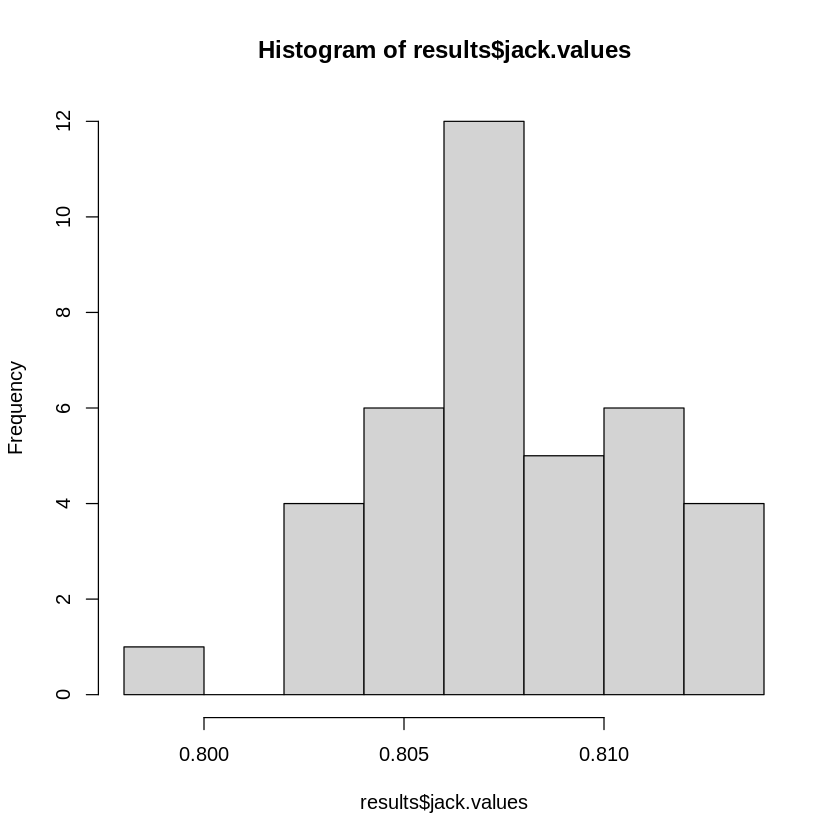

In [39]:
hist(results$jack.values)

#### По дисперсии

In [40]:
theta <- function(x){var(x)}

results <- jackknife(data_metadata$carotidIMTmean, theta)
results

$jack.se
[1] 0.003213536

$jack.bias
[1] 0

$jack.values
 [1] 0.01512450 0.01587081 0.01584940 0.01589304 0.01348756 0.01585529
 [7] 0.01538122 0.01588657 0.01585140 0.01559649 0.01579257 0.01587242
[13] 0.01551253 0.01585717 0.01508436 0.01577411 0.01485272 0.01556086
[19] 0.01589137 0.01515556 0.01587234 0.01590002 0.01570276 0.01483441
[25] 0.01590096 0.01446769 0.01558632 0.01584940 0.01584539 0.01563910
[31] 0.01510873 0.01502752 0.01589528 0.01574042 0.01460289 0.01579836
[37] 0.01513191 0.01485320

$call
jackknife(x = data_metadata$carotidIMTmean, theta = theta)


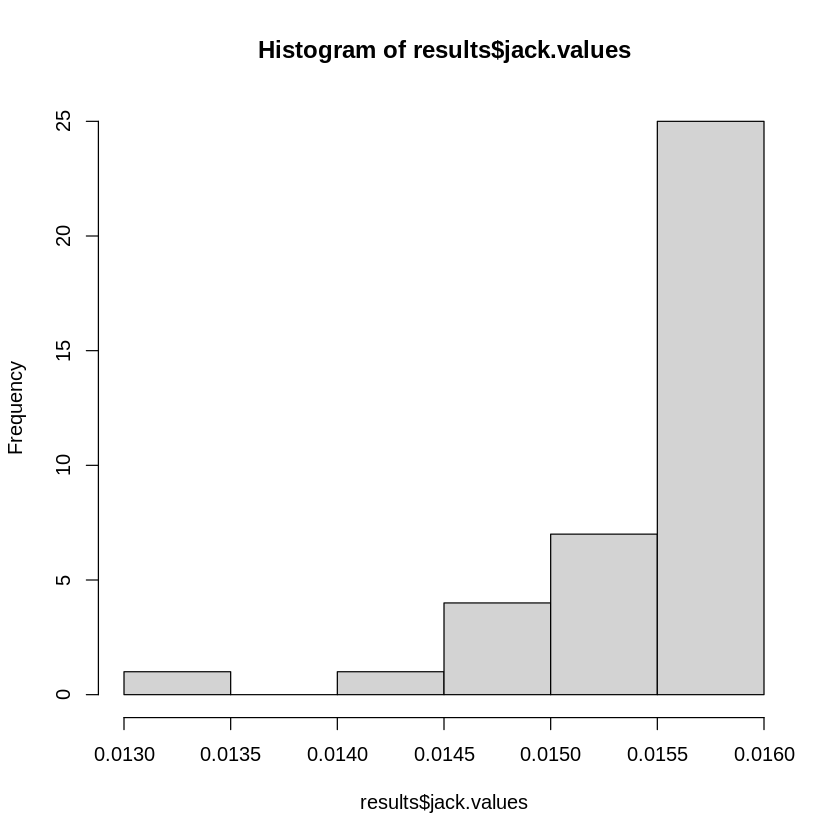

In [41]:
hist(results$jack.values)